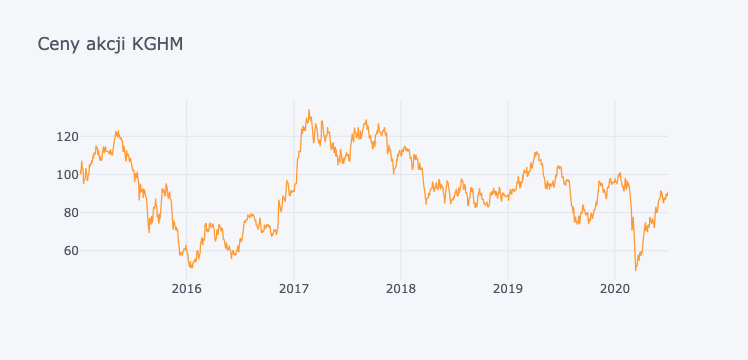

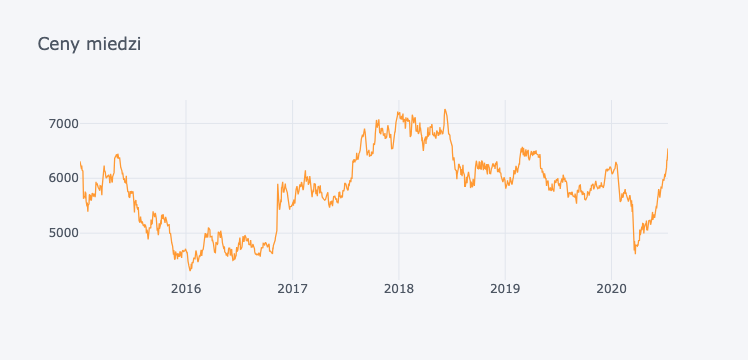

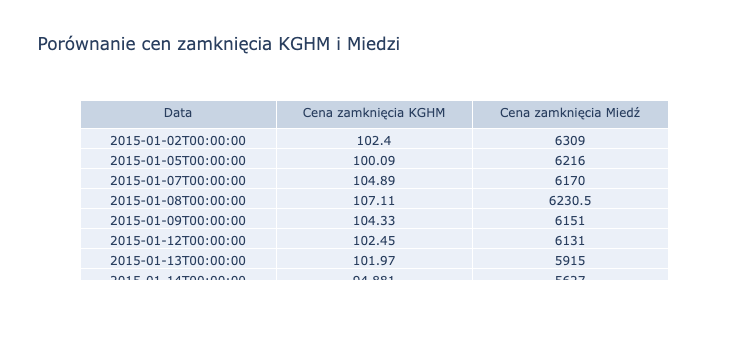

In [1]:
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as pyo
import cufflinks as cf
cf.go_offline()
pyo.init_notebook_mode(connected=True)


kghm_df = pd.read_csv('/Users/pawelwrzesinski/desktop/Kodilla/kgh_d.csv', parse_dates=['Data'])
copper_df = pd.read_csv('/Users/pawelwrzesinski/desktop/Kodilla/ca_c_f_d.csv', parse_dates=['Data'])


kghm_df = kghm_df.sort_values(by='Data')
copper_df = copper_df.sort_values(by='Data')


kghm_df.set_index('Data')['Zamkniecie'].iplot(kind='line', title='Ceny akcji KGHM')
copper_df.set_index('Data')['Zamkniecie'].iplot(kind='line', title='Ceny miedzi')


merged_df = pd.merge(kghm_df[['Data', 'Zamkniecie']], copper_df[['Data', 'Zamkniecie']], on='Data', suffixes=('_KGHM', '_Copper'))


table = go.Figure(data=[go.Table(
    header=dict(values=["Data", "Cena zamknięcia KGHM", "Cena zamknięcia Miedź"]),
    cells=dict(values=[merged_df['Data'], merged_df['Zamkniecie_KGHM'], merged_df['Zamkniecie_Copper']])
)])


table.update_layout(title="Porównanie cen zamknięcia KGHM i Miedzi")
pyo.iplot(table)
